### Importing the different packages reqd.

In [1]:
import string
import os
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [ ]:
main_path='/content/drive/MyDrive/train/' # This is stores the path of the dataset present in my drive

### Creating labels for the dataset

<ul>
<li>The labels are in the form of a dictionary.</li>
<li>Each 62 numbers i.e from 0-61 represents a unique class eg:- 10 corresponds to A,so on.</li>
</ul>


In [ ]:
def create_labels(): 
  labels={}
  count=0
  for i in range(0,10):
    labels[i]=i
    count+=1
  upper_case_alphabets = string.ascii_uppercase
  for i in upper_case_alphabets:
    labels[count]=i
    count+=1
  lower_case_alphabets = string.ascii_lowercase

  for i in lower_case_alphabets:
    labels[count]=i
    count+=1
  
  return labels,count

In [ ]:
labels,count= create_labels()

In [ ]:
count

62

In [ ]:
print(labels)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'}


### Storing the path of images and their corresponding labels

<ul>
<li>In this step i stored the path of the images in my x and the corresponding label of the image in y.</li>
</ul>

The function *create_data* stores the paths of the images.

In [ ]:
def create_data():
  X = []
  y = []
  for k in range(1,63):  # Since there are 62 labels
    path_1 = str('{:03}'.format(k)); # This stores the number like 001,002,003,etc.
    for i in range(1,60):
      path_of_folder = 'Sample'+path_1 # Stores the path of folder like Sample001, Sample002
      path_of_data = path_of_folder+'/img'+path_1+'-'+str('{:03}'.format(i)) +'.png' # Stores the image path in the folder 
      if os.path.exists(main_path + path_of_data):
        X.append(path_of_data)
        y.append(k-1)  
      else:
        continue
  return X,y

In [ ]:
X,y=create_data()

In [ ]:
X[0]

'Sample001/img001-001.png'

In [ ]:
len(X)

2480

<ul>
<li>
Plotted and visualised few images from dataset.
</li>
</ul>

In [ ]:
img = cv2.imread(main_path+'Sample001/img001-001.png')

In [ ]:
img.shape

(900, 1200, 3)

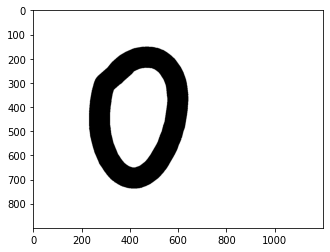

In [ ]:
pyplot.imshow(img)

In [ ]:
len(X)

2480

<li>Visualising the number of images per class.</li>

In [ ]:
from collections import Counter
counter=Counter(y)
x_axis=[]
y_axis=[]
for k,v in counter.items():
  x_axis.append(k)
  y_axis.append(v)

<BarContainer object of 62 artists>

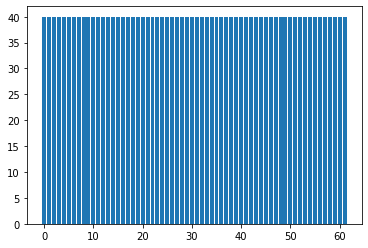

In [ ]:
pyplot.bar(x_axis,y_axis)

<ul>From above bar graph it is clear that every class has equal number of images.</ul>

### Creating Model

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.layers import Conv2D,MaxPooling2D, AveragePooling2D , BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from keras.regularizers import L2

<ul>Model consists of 3 Convolution Layers and then two fully connected layers and a softmax layer. The Architecture is :
<li>Conv2d - 32 filters, 5x5 Filter Size , activation = relu</li>
<li>BatchNormalization()</li>
<li>MaxPooling of 2 x 2</li>
<br>
<li>Conv2d - 32 filters, 3x3 Filter Size , activation = relu</li>
<li>BatchNormalization()</li>
<li>MaxPooling of 2 x 2</li>
<br>
<li>Conv2d - 64 filters, 3x3 Filter Size , activation = relu</li>
<li>BatchNormalization()</li>
<li>MaxPooling of 2 x 2</li>
<br>
<li>Then the output of conv is then flattened.</li>
<br>
<li>Dense Layer - 128 Neurons, activation = relu </li>
<br>
<li>Dense Layer - 64 Neurons, activation = relu </li>
<br>
<li>Softmax Layer-62 Neurons, activation = relu </li>
<br>
<li>Used adam optimizer and categorical crossentropy loss function</li>
</ul>

I chose this architecture as the dataset was small, hence if i had added more
parameters in my model then it would have been overfitting and not able to produce good results on unseen data.
<br>
I added BartchNormalisation after every Conv layer so that every input to each layer would become standardized which would help in stabilizing the learning process.
<br>
MaxPooling is used to reduce the parameters of the model and the computation.

In [ ]:
model=Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(62,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_40 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
batch_normalization_41 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 4, 4, 64)        

### Splitting the dataset into Train and Cross-Validation

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from PIL import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import pickle
from keras.callbacks import  ModelCheckpoint

<ul>
<li>Splitting the dataset into train and cross validation set.</li>
<li>I splitted the train set into cross val set to keep a track of underfit,overfit and bestfit of the model.</li>
</ul>

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size=0.2, random_state=4)

Converting labels to categorical array



In [ ]:
y_train=to_categorical(y_train,num_classes=62,dtype='int')
y_cv=to_categorical(y_cv,num_classes=62,dtype='int')

In [ ]:
y_train.shape

(1984, 62)

### Retrieving the images from the path

<ul><li>As the images had a lot of white spaces and only small portion contained the characters.</li> 
<li>I converted my images to grayscale and then i cropped the white spaces from the image and image only contained the portion which contained the character.</li>
<li>The image is then resized to (32,32).</li>
<li>The pixel values where then normalised so that each pixel value comes between 0 to 1.</li>
<li>source:- <a href="url">https://stackoverflow.com/questions/49907382/how-to-remove-whitespace-from-an-image-in-opencv</a></li>
</ul>

*covert_data_to_img*  function does the required preprocessing of the images.

In [ ]:
def convert_data_to_img(data_path,labels_vector):
  img_vector=[]
  pred=[]
  for i in range(0,len(data_path)):
    img=cv2.imread(main_path+data_path[i])
    img_gray_scale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray=255*(gray<128)
    coords=cv2.findNonZero(gray)
    x,y,w,h=cv2.boundingRect(coords)
    img_gray_scale=img_gray_scale[y:y+h,x:x+w]
    data=Image.fromarray(img_gray_scale)
    data=data.resize((32,32))
    data=image.img_to_array(data)
    data=data/225.0
    img_vector.append(data)
    pred.append(labels_vector[i])
  
  return np.array(img_vector),np.array(pred)

In [ ]:
train_img_vector,y_train_pred=convert_data_to_img(X_train,y_train) # Converting train images into corresponding vectors.

In [ ]:
y_train_pred.shape

(1984, 62)

In [ ]:
train_img_vector.shape

(1984, 32, 32, 1)

In [ ]:
with open("/content/drive/MyDrive/Saved_Material_task2_part 1/train_img_vector_normalised.pkl","wb") as d:
  pickle.dump(train_img_vector,d)# Saving image vectors so for future purpose.

In [ ]:
with open("/content/drive/MyDrive/Saved_Material_task2_part 1/train_pred_vector.pkl","wb") as d:
  pickle.dump(y_train_pred,d) # Saving label vectors so for future purpose.

In [ ]:
train_img_vector.shape # Checking the shape of the image vectors.

(1984, 32, 32, 1)

<ul>
<li>Visualising first 9 images after preprocessing. Note:- The images are in grayscale.</li>
</ul>

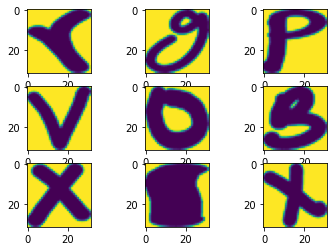

In [ ]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_img_vector[i].reshape(32,32))

In [ ]:
X_img_cv,y_pred_cv=convert_data_to_img(X_cv,y_cv) # Converting cross val images into corresponding vectors.

In [ ]:
X_img_cv.shape # Checking the shape of the image vectors.

(496, 32, 32, 1)

In [ ]:
y_pred_cv.shape # Checking the shape of the prediction vectors.

(496, 62)

In [ ]:
import pickle
with open("/content/drive/MyDrive/Saved_Material_task2_part 1/cross_val_img_vector_normalised.pkl","wb") as d:
  pickle.dump(X_img_cv,d)# Saving image vectors so for future purpose.

In [ ]:
import pickle
with open("/content/drive/MyDrive/Saved_Material_task1/cross_val_pred_vector.pkl","wb") as d:
  pickle.dump(y_pred_cv,d)# Saving label vectors so for future purpose.

In [ ]:
X_img_cv=pd.read_pickle("/content/drive/MyDrive/Saved_Material_task2_part 1/cross_val_img_vector_normalised.pkl")

In [ ]:
y_pred_cv=pd.read_pickle("/content/drive/MyDrive/Saved_Material_task2_part 1/cross_val_pred_vector.pkl")

<ul>
<li>Since the images in the dataset for each class where not so different from each other and the dataset was small.</li>
<li>Hence i added some noise to the train set to bring diversity in the dataset for this i used the ImageDataGenerator of keras.</li>
<li>I added width_shift_range which shifts the image to left or right randomly and the rotation range was set to 20 which rotates the image from -20 to +20.</li>
<a href="url">https://heartbeat.fritz.ai/overcoming-overfitting-in-image-classification-using-data-augmentation-9858c5cee986</a>
</ul>

In [ ]:
datagen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1)

<ul>
<li>Visualizing the images after applying the data generator</li> 
</ul>

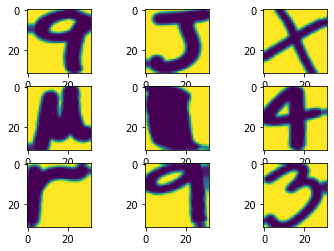

In [ ]:
for X_batch, y_batch in datagen.flow(train_img_vector, y_train_pred, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(32,32))
    # show the plot
    pyplot.show()
    break

### Training the model

<li>Setting path to save model checkpoints.</li>

In [ ]:
model_path='Model.epoch{epoch:02d}.hdf5'
checkpoint= ModelCheckpoint(filepath='/content/drive/MyDrive/Saved_Material_task2_part 1/'+model_path,verbose=1)

Training on the training dataset.

In [ ]:
callbacks=[checkpoint]
history = model.fit(datagen.flow(train_img_vector,y_train_pred,batch_size=32),validation_data=(X_img_cv,y_pred_cv),steps_per_epoch=len(train_img_vector)//32,epochs=15,callbacks=callbacks)

Epoch 1/15
62/62 [==============================] - 5s 63ms/step - loss: 4.0535 - accuracy: 0.0786 - val_loss: 4.0790 - val_accuracy: 0.0282

Epoch 00001: saving model to /content/drive/MyDrive/Saved_Material_task1/Model.epoch01.hdf5
Epoch 2/15
62/62 [==============================] - 4s 58ms/step - loss: 2.4320 - accuracy: 0.3762 - val_loss: 4.1344 - val_accuracy: 0.0363

Epoch 00002: saving model to /content/drive/MyDrive/Saved_Material_task1/Model.epoch02.hdf5
Epoch 3/15
62/62 [==============================] - 4s 59ms/step - loss: 1.3848 - accuracy: 0.6197 - val_loss: 4.1647 - val_accuracy: 0.0403

Epoch 00003: saving model to /content/drive/MyDrive/Saved_Material_task1/Model.epoch03.hdf5
Epoch 4/15
62/62 [==============================] - 4s 60ms/step - loss: 1.1423 - accuracy: 0.6744 - val_loss: 4.0766 - val_accuracy: 0.0625

Epoch 00004: saving model to /content/drive/MyDrive/Saved_Material_task1/Model.epoch04.hdf5
Epoch 5/15
62/62 [==============================] - 4s 58ms/step

<ul>
<li>Plotting the graph for accuracy</li>
</ul>

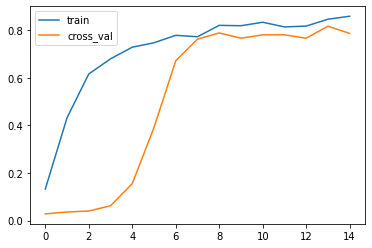

In [ ]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='cross_val')
pyplot.legend()
pyplot.show()

<ul>
<li>The graph for loss.</li>
<li>As infered from the loss b/w train and cross validation set the best fit model is between 8-10 these epochs i.e lower bound=8 and upper bound=10 these epochs. </li>
<li>Before the lower bound epoch the model is underfitting (low bias) and beyond the upper bound the model is overfitting (high variance).</li>
<li>Hence I would be choosing the 9th epoch for the further parts.</li>
<li>The train accuracy = 0.8032 and val accuracy = 0.7883</li>
<li>source:- <a href="url">https://medium.com/@minions.k/underfit-and-overfit-explained-8161559b37db</a></li>
</ul>

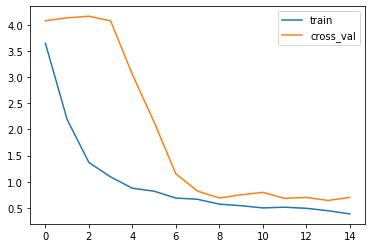

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='cross_val')
pyplot.legend()
pyplot.show()

For Testing:-
<li>Preprocess The image according to the preprocessing steps applied in the function convert_data_to_img.</li>